# Crawling data berita

In [62]:
!pip install Sastrawi
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

import warnings
import pandas as pd
import numpy as np
import nltk
import re
import csv

nltk.download('stopwords')
nltk.download('punkt')
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**Crawling Berita Radar Jatim**

In [63]:
import requests
from bs4 import BeautifulSoup
import nltk
import pandas as pd

# Unduh konten halaman web berita
url = "https://radarjatim.id/festival-film-pendek-layar-lokal-diserbu-ratusan-pelajar-sma-dan-smk/"
response = requests.get(url)
html = response.text

# Parsing halaman web menggunakan BeautifulSoup
soup = BeautifulSoup(html, 'html.parser')

# Ekstraksi teks dari elemen-elemen yang berisi berita
article = soup.find('div', class_="content-inner")  # Sesuaikan dengan struktur HTML halaman web berita

# Periksa apakah elemen article ada sebelum mencoba mengambil teksnya
if article is not None:
    article_text = article.get_text()

    # Tokenisasi teks menjadi kalimat menggunakan nltk
    nltk.download('punkt')  # Pastikan Anda sudah mengunduh tokenisasi kalimat nltk
    sentences = nltk.sent_tokenize(article_text)

    # Cetak kalimat-kalimat
    for sentence in sentences:
        print(sentence)
else:
    print("Elemen berita tidak ditemukan")


SIDOARJO (RadarJatim.id) — Komunitas-komunitas film pendek yang ada di Sidoarjo terus bergerak, mensosialisasikan keberadaan film pendek yang berkembang membaik.
Kali ini bertemakan ‘Keanekaragaman Lokalitas dan Budaya’ pada tanggal 28-29 Oktober 2023 di Gedung Dewan Kesenian Sidoarjo.
Festival yang memutar film ‘Layar Lokal’ mengangkat kearifan lokal dari berbagai wilayah di Indonesia tersebut, tak diduga diserbu oleh para remaja, rata-rata pelajar SMA, SMK Sidoarjo, Surabaya dan sekitarnya.
Sehingga panitia pun harus menambahkan kursi untuk penonton.
Ketua Asfis (Asosiasi Sineas Film Sidoarjo) Rehal Lahir Prias Sumputari mengatakan kalau kegiatannya mempunyai tiga program utama, yaitu pelatihan, workshop dan pemutaran film.
Juga membantu teman-teman komunitas film yang ada di Sidoarjo, khususnya untuk mendistribusikan karya-karyanya ke berbagai festival.
“Karena kebanyakan teman-teman saat ini kendalanya adalah bagaimana film ini setelah syuting.
Itu mau dikemanakan, teman-teman mas

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**Preprocessing**

In [64]:
# Lowercasing
article_text = article_text.lower()

# Cleaning
article_text = ''.join(e for e in article_text if (e.isalnum() or e.isspace() or e == '.'))

# Hapus Angka
article_text = ''.join([char for char in article_text if not char.isdigit()])

# Tokenisasi teks menjadi kalimat menggunakan nltk
nltk.download('punkt')
sentences = nltk.sent_tokenize(article_text)

# Tokenisasi setiap kalimat menjadi kata-kata
words = [nltk.word_tokenize(sentence) for sentence in sentences]




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [65]:
#custome stopword
from nltk.corpus import stopwords

# Mengambil daftar stopword bahasa Indonesia dari NLTK
stopwords_indonesia = set(stopwords.words("indonesian"))

# Sekarang, Anda memiliki daftar stopword yang telah diperbarui
print(stopwords_indonesia)

{'lain', 'sampaikan', 'berarti', 'kalau', 'sudahlah', 'sesaat', 'sejenak', 'semata-mata', 'bila', 'selain', 'persoalan', 'lamanya', 'panjang', 'jelaslah', 'dijelaskannya', 'sekadar', 'menjawab', 'berturut-turut', 'kecil', 'manalagi', 'apalagi', 'dialah', 'mengibaratkannya', 'harus', 'sekiranya', 'janganlah', 'dong', 'hampir', 'sebaik', 'diantara', 'setinggi', 'semampu', 'sampai-sampai', 'keadaan', 'begitu', 'dilakukan', 'mengerjakan', 'mungkin', 'mendapat', 'usai', 'akhir', 'diperlihatkan', 'sendirinya', 'secukupnya', 'disebutkan', 'walau', 'diberikannya', 'perlunya', 'diketahui', 'awal', 'nyatanya', 'diakhirinya', 'dimaksud', 'jadinya', 'kepada', 'bukanlah', 'kelihatannya', 'siap', 'maka', 'bolehlah', 'sebagai', 'berkata', 'semampunya', 'terakhir', 'umumnya', 'beberapa', 'juga', 'selama', 'jelaskan', 'diketahuinya', 'memihak', 'kamulah', 'dipersoalkan', 'berlangsung', 'lewat', 'ia', 'terbanyak', 'berikut', 'tidakkah', 'teringat-ingat', 'lalu', 'sebab', 'kala', 'mengatakan', 'jika', 'c

In [66]:
# Stopword Removal
stop_words = set(stopwords.words('indonesian'))
filtered_sentences = []


for sentence in words:
    filtered_sentence = [word for word in sentence if word.lower() not in stop_words]
    filtered_sentences.append(filtered_sentence)


# Cetak kalimat-kalimat yang telah diproses
for filtered_sentence in filtered_sentences:
    print(filtered_sentence)

# Tutup respons setelah digunakan
response.close()

['sidoarjo', 'radarjatim.id', 'komunitaskomunitas', 'film', 'pendek', 'sidoarjo', 'bergerak', 'mensosialisasikan', 'keberadaan', 'film', 'pendek', 'berkembang', 'membaik', '.']
['kali', 'bertemakan', 'keanekaragaman', 'lokalitas', 'budaya', 'tanggal', 'oktober', 'gedung', 'dewan', 'kesenian', 'sidoarjo', '.']
['festival', 'memutar', 'film', 'layar', 'lokal', 'mengangkat', 'kearifan', 'lokal', 'wilayah', 'indonesia', 'diduga', 'diserbu', 'remaja', 'ratarata', 'pelajar', 'sma', 'smk', 'sidoarjo', 'surabaya', '.']
['panitia', 'kursi', 'penonton', '.']
['ketua', 'asfis', 'asosiasi', 'sineas', 'film', 'sidoarjo', 'rehal', 'lahir', 'prias', 'sumputari', 'kegiatannya', 'program', 'utama', 'pelatihan', 'workshop', 'pemutaran', 'film', '.']
['membantu', 'temanteman', 'komunitas', 'film', 'sidoarjo', 'mendistribusikan', 'karyakaryanya', 'festival', '.']
['kebanyakan', 'temanteman', 'kendalanya', 'film', 'syuting', '.']
['dikemanakan', 'temanteman', 'bingung', 'disiapkan', '.']
['tugas', 'bersama

**TF-IDF**

In [50]:
pip install tabulate


In [67]:
from tabulate import tabulate
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming filtered_sentences is a list of sentences after stopword removal

# Join the filtered sentences into a list of strings
corpus = [' '.join(sentence) for sentence in filtered_sentences]

# Create the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the corpus to get the TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(corpus)

# Get the feature names (words) from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Convert the TF-IDF matrix to a Pandas DataFrame for better visualization
df = pd.DataFrame(data=tfidf_matrix.toarray(), columns=feature_names)

# Add a column for the sentences
df.insert(0, 'Kalimat', [' '.join(sentence) for sentence in filtered_sentences])

# Add a column for the sentence numbers
df.insert(0, 'No', range(1, len(filtered_sentences) + 1))

# Add a column for the count of terms in each sentence
df['Term Count'] = df.drop(['Kalimat', 'No'], axis=1).gt(0).sum(axis=1)

# Set the display options for Pandas to show all columns without truncation
pd.set_option("display.max_columns", None)

# Print the DataFrame in a tabular format with borders
table = tabulate(df, headers='keys', tablefmt='fancy_grid', showindex=False)
print(table)


╒══════╤══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╤══════════╤═════════════════╤═════════╤═══════════════════════════════════════════════╤════════════╤══════════╤═══════════╤═════════════╤════════════╤════════════════╤════════════╤═══════════════╤══════════════╤═══════════════╤════════════╤══════════════╤═══════════╤═══════════╤══════════╤══════════╤════════════════╤══════════╤══════════╤═══════════════╤═══════════╤═════════════╤════════════╤══════════╤═══════════╤══════════════╤════════════╤══════════╤════════════╤═══════════════╤═════════════╤════════════════╤═════════╤══════════╤══════════╤══════════╤══════════╤══════════╤══════════════╤═════════════╤═════════════╤════════════╤══════════╤══════════╤══════════╤══════════╤═════════════════╤══════════════════╤════════════╤══════════════╤══════════════╤═══════════════╤══════════════╤════════════╤═════════╤═════════════╤═══════════════

In [52]:
len(feature_names)

130

**Cosine Similarity**


Cosine similarity (similaritas kosinus) adalah metode untuk mengukur sejauh mana dua vektor arah berada dalam hubungan linear satu sama lain. Metode ini sering digunakan dalam pemrosesan bahasa alami dan pengelompokan data. Ketika diterapkan pada representasi vektor dari dokumen atau teks, cosine similarity memberikan ukuran sejauh mana dua dokumen memiliki arah yang mirip di dalam ruang vektor.

**Rumus :**
# 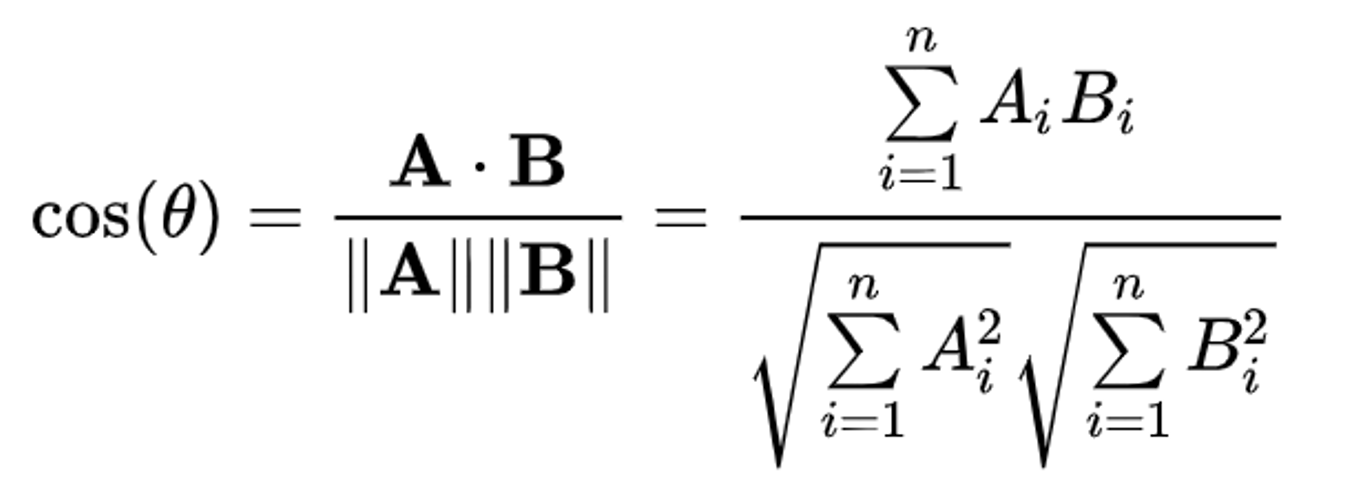


In [68]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# Indeks kalimat yang akan dibandingkan
sentence1_index = 0  # Ganti dengan indeks kalimat pertama yang ingin Anda bandingkan
sentence2_index = 1  # Ganti dengan indeks kalimat kedua yang ingin Anda bandingkan

# Ambil vektor TF-IDF untuk kedua kalimat
tfidf_vector1 = tfidf_matrix[sentence1_index]
tfidf_vector2 = tfidf_matrix[sentence2_index]

# Hitung cosine similarity antara kedua vektor
similarity = cosine_similarity(tfidf_vector1, tfidf_vector2)

# Cetak hasil cosine similarity
print(f"Cosine Similarity antara Kalimat {sentence1_index + 1} dan Kalimat {sentence2_index + 1}: {similarity[0][0]:.4f}")

Cosine Similarity antara Kalimat 1 dan Kalimat 2: 0.0655


In [69]:
# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)

# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Cetak hasil similarity_matrix
num_sentences = len(sentences)  # Jumlah kalimat
for i in range(num_sentences):
    for j in range(i+1, num_sentences):
        similarity = similarity_matrix[i][j]
        print(f"Cosine Similarity antara Kalimat {i + 1} dan Kalimat {j + 1}: {similarity:.4f}")

Cosine Similarity antara Kalimat 1 dan Kalimat 2: 0.0655
Cosine Similarity antara Kalimat 1 dan Kalimat 3: 0.0796
Cosine Similarity antara Kalimat 1 dan Kalimat 4: 0.0000
Cosine Similarity antara Kalimat 1 dan Kalimat 5: 0.1082
Cosine Similarity antara Kalimat 1 dan Kalimat 6: 0.1341
Cosine Similarity antara Kalimat 1 dan Kalimat 7: 0.0561
Cosine Similarity antara Kalimat 1 dan Kalimat 8: 0.0000
Cosine Similarity antara Kalimat 1 dan Kalimat 9: 0.0506
Cosine Similarity antara Kalimat 1 dan Kalimat 10: 0.1075
Cosine Similarity antara Kalimat 1 dan Kalimat 11: 0.0361
Cosine Similarity antara Kalimat 1 dan Kalimat 12: 0.0298
Cosine Similarity antara Kalimat 1 dan Kalimat 13: 0.0000
Cosine Similarity antara Kalimat 1 dan Kalimat 14: 0.0455
Cosine Similarity antara Kalimat 1 dan Kalimat 15: 0.0369
Cosine Similarity antara Kalimat 1 dan Kalimat 16: 0.0000
Cosine Similarity antara Kalimat 1 dan Kalimat 17: 0.1443
Cosine Similarity antara Kalimat 1 dan Kalimat 18: 0.0000
Cosine Similarity anta

In [70]:
import pandas as pd

# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)
# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Nama kolom dan indeks untuk DataFrame
sentence_indices = [f"Kalimat {i + 1}" for i in range(len(sentences))]

# Buat DataFrame dari hasil cosine similarity
df = pd.DataFrame(similarity_matrix, columns=sentence_indices, index=sentence_indices)

# Cetak DataFrame
df

,Kalimat 1,Kalimat 2,Kalimat 3,Kalimat 4,Kalimat 5,Kalimat 6,Kalimat 7,Kalimat 8,Kalimat 9,Kalimat 10,Kalimat 11,Kalimat 12,Kalimat 13,Kalimat 14,Kalimat 15,Kalimat 16,Kalimat 17,Kalimat 18,Kalimat 19,Kalimat 20
Kalimat 1,1.000000,0.065459,0.079632,0.0,0.108175,0.134066,0.056099,0.000000,0.050648,0.107483,0.036051,0.029845,0.000000,0.045513,0.036936,0.000000,0.144280,0.000000,0.000000,0.056650
Kalimat 2,0.065459,1.000000,0.031347,0.0,0.031969,0.052775,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.168712,0.000000,0.000000,0.000000
Kalimat 3,0.079632,0.031347,1.000000,0.0,0.051803,0.107087,0.026865,0.000000,0.024255,0.051472,0.168226,0.128458,0.000000,0.021796,0.206892,0.093714,0.298494,0.000000,0.129277,0.000000
Kalimat 4,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Kalimat 5,0.108175,0.031969,0.051803,0.0,1.000000,0.087214,0.054795,0.000000,0.049471,0.161464,0.035213,0.029151,0.000000,0.044455,0.036078,0.000000,0.093858,0.000000,0.000000,0.045053
Kalimat 6,0.134066,0.052775,0.107087,0.0,0.087214,1.000000,0.150079,0.104357,0.040834,0.086657,0.087541,0.120879,0.000000,0.036694,0.029779,0.113192,0.194024,0.086733,0.000000,0.000000
Kalimat 7,0.056099,0.000000,0.026865,0.0,0.054795,0.150079,1.000000,0.131518,0.051462,0.109211,0.036630,0.150539,0.000000,0.046245,0.037530,0.076373,0.048674,0.109307,0.000000,0.000000
Kalimat 8,0.000000,0.000000,0.000000,0.0,0.000000,0.104357,0.131518,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076014,0.000000,0.108792,0.000000,0.000000
Kalimat 9,0.050648,0.000000,0.024255,0.0,0.049471,0.040834,0.051462,0.000000,1.000000,0.098601,0.033072,0.027378,0.000000,0.041752,0.033884,0.000000,0.043945,0.000000,0.000000,0.000000
Kalimat 10,0.107483,0.000000,0.051472,0.0,0.161464,0.086657,0.109211,0.000000,0.098601,1.000000,0.070183,0.058101,0.000000,0.088604,0.071906,0.000000,0.093258,0.000000,0.000000,0.059864


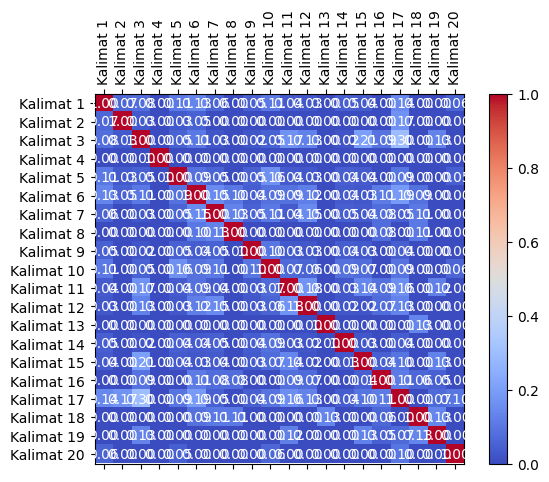

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)
# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Nama kolom dan indeks untuk DataFrame
sentence_indices = [f"Kalimat {i + 1}" for i in range(len(sentences))]

# Buat DataFrame dari hasil cosine similarity
df = pd.DataFrame(similarity_matrix, columns=sentence_indices, index=sentence_indices)

# Membuat grafik matriks
fig, ax = plt.subplots()
cax = ax.matshow(df, cmap='coolwarm')
fig.colorbar(cax)

# Memberi label pada sumbu X dan Y
ax.set_xticks(np.arange(len(df.columns)))
ax.set_yticks(np.arange(len(df.index)))
ax.set_xticklabels(df.columns, rotation=90)
ax.set_yticklabels(df.index)

# Menampilkan nilai similarity pada matriks
for i in range(len(df.index)):
    for j in range(len(df.columns)):
        text = ax.text(j, i, f'{df.iat[i, j]:.2f}', ha='center', va='center', color='w')

plt.show()

**Closeness Centrality**


Closeness centrality adalah salah satu metrik dalam analisis jaringan yang mengukur seberapa dekat suatu simpul (node) dengan simpul-simpul lain dalam jaringan tersebut. Suatu simpul dianggap "sentral" jika jaraknya ke simpul-simpul lain relatif lebih pendek dibandingkan dengan simpul-simpul lainnya. Closeness centrality didefinisikan sebagai kebalikan dari total jarak dari simpul tersebut ke semua simpul lain dalam jaringan.

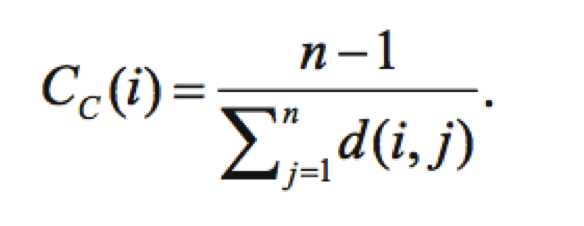

**Closennes Centrality**

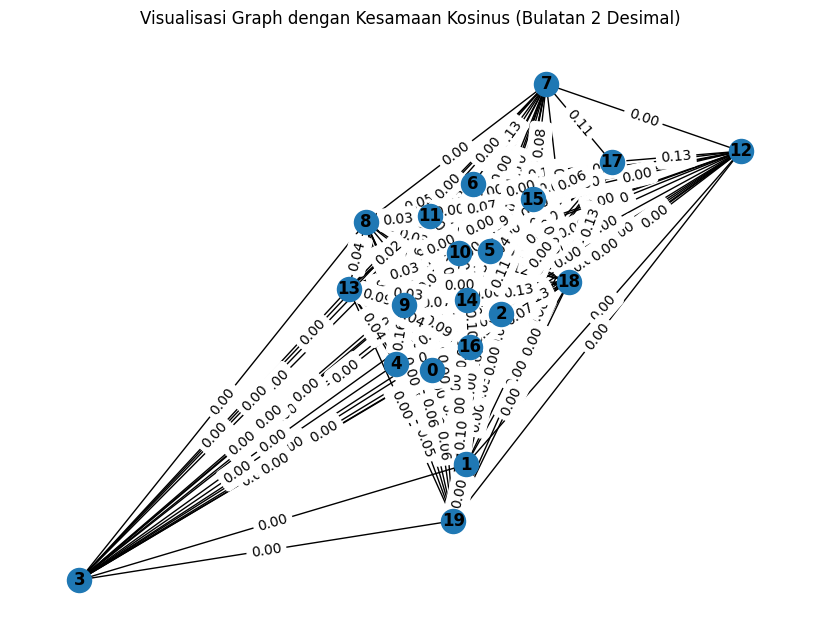

In [72]:
import math
from collections import Counter
import networkx as nx
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import matplotlib.pyplot as plt

# Diasumsikan similarity_matrix sudah didefinisikan sebelumnya
# Contoh similarity_matrix

G = nx.Graph()
for i in range(len(similarity_matrix)):
    for j in range(len(similarity_matrix[0])):
        if i != j:
            similarity = round(similarity_matrix[i][j], 2)  # Bulatkan nilai ke 2 angka dibelakang koma
            G.add_edge(i, j, weight=similarity)

# Visualisasi grafik
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)  # Menentukan layout grafik
nx.draw(G, pos, with_labels=True, font_weight='bold')  # Menggambar grafik dengan label node
edge_labels = nx.get_edge_attributes(G, 'weight')  # Mendapatkan atribut edge (bobot)
# Mengubah nilai bobot menjadi string dengan 2 angka di belakang koma
edge_labels = {(i, j): f"{weight:.2f}" for (i, j), weight in edge_labels.items()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)  # Menampilkan label bobot pada edge
plt.title("Visualisasi Graph dengan Kesamaan Kosinus (Bulatan 2 Desimal)")
plt.show()

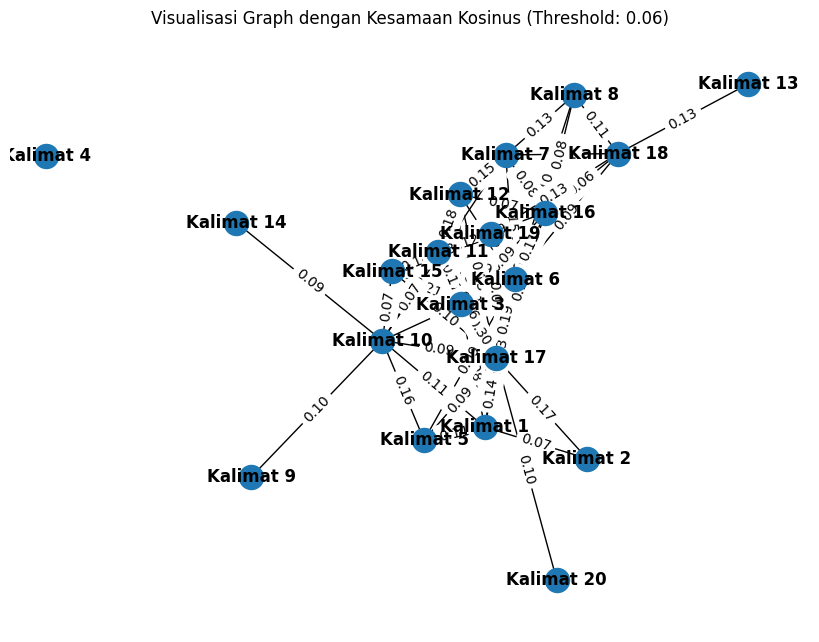

In [73]:
import math
from collections import Counter
import networkx as nx
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import matplotlib.pyplot as plt

# Diasumsikan similarity_matrix sudah didefinisikan sebelumnya
# Contoh similarity_matrix

G = nx.Graph()
threshold = 0.06  # Threshold untuk menyambungkan node

# Tambahkan semua node ke grafik
num_nodes = len(similarity_matrix)
G.add_nodes_from(range(num_nodes))

# Tambahkan edge antara node yang nilainya melebihi threshold
for i in range(num_nodes):
    for j in range(num_nodes):
        if i != j and similarity_matrix[i][j] > threshold:
            similarity = round(similarity_matrix[i][j], 2)  # Bulatkan nilai ke 2 angka dibelakang koma
            G.add_edge(i, j, weight=similarity)

# Visualisasi grafik
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)  # Menentukan layout grafik

# Buat mapping untuk label node
node_labels = {i: f"Kalimat {i + 1}" for i in range(num_nodes)}

nx.draw(G, pos, with_labels=True, labels=node_labels, font_weight='bold')  # Menggambar grafik dengan label node
edge_labels = nx.get_edge_attributes(G, 'weight')  # Mendapatkan atribut edge (bobot)
# Mengubah nilai bobot menjadi string dengan 2 angka di belakang koma
edge_labels = {(i, j): f"{weight:.2f}" for (i, j), weight in edge_labels.items()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)  # Menampilkan label bobot pada edge

# Tambahkan label pada node yang tidak terhubung
isolated_nodes = list(nx.isolates(G))
if isolated_nodes:
    pos_extra = {node: (pos[node][0], pos[node][1] + 0.1) for node in isolated_nodes}

plt.title(f"Visualisasi Graph dengan Kesamaan Kosinus (Threshold: {threshold})")
plt.show()

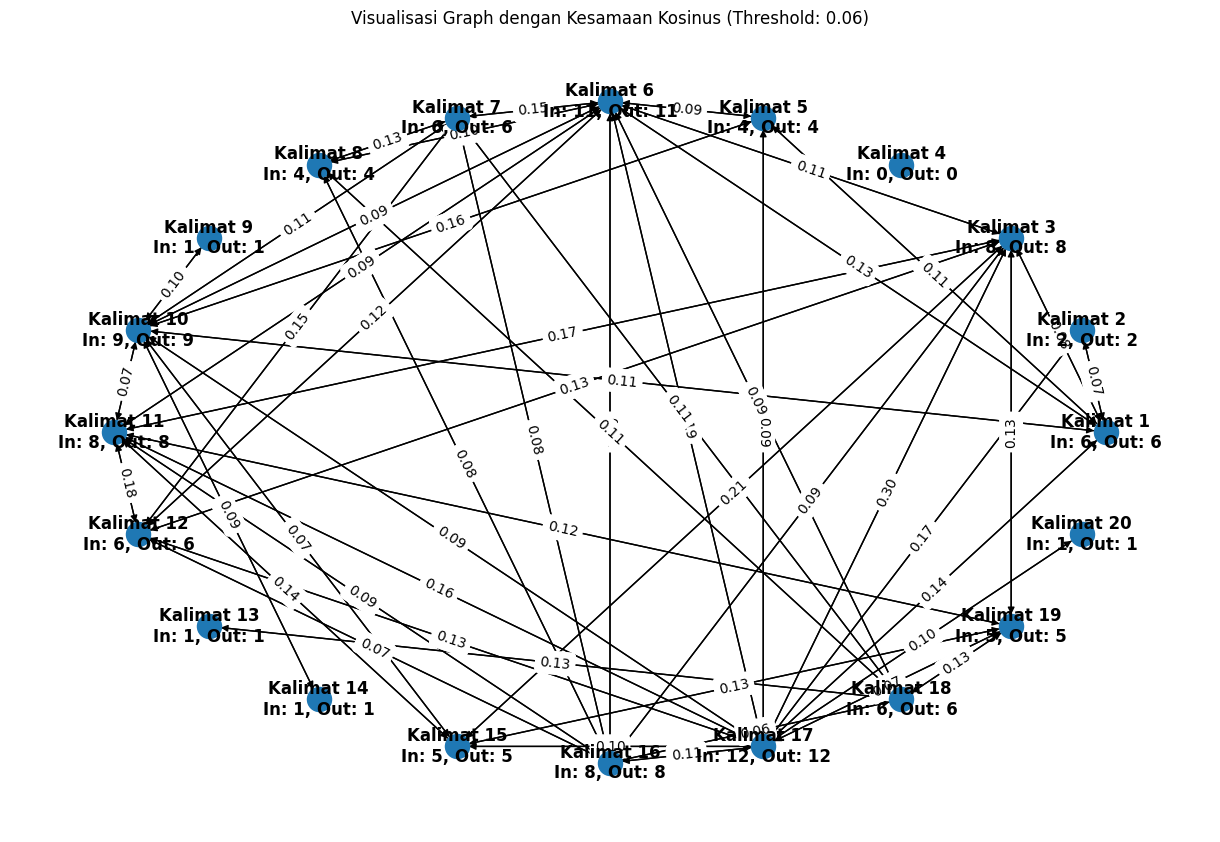

In [74]:
import math
from collections import Counter
import networkx as nx
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import matplotlib.pyplot as plt

# Diasumsikan similarity_matrix sudah didefinisikan sebelumnya
# Contoh similarity_matrix


G = nx.DiGraph()  # Menggunakan Directed Graph agar dapat mengakses in_degree dan out_degree
threshold = 0.06  # Threshold untuk menyambungkan node

# Tambahkan semua node ke grafik
num_nodes = len(similarity_matrix)
G.add_nodes_from(range(num_nodes))

# Tambahkan edge antara node yang nilainya melebihi threshold
for i in range(num_nodes):
    for j in range(num_nodes):
        if i != j and similarity_matrix[i][j] > threshold:
            similarity = round(similarity_matrix[i][j], 2)  # Bulatkan nilai ke 2 angka dibelakang koma
            G.add_edge(i, j, weight=similarity)

# Hitung indegree dan outdegree untuk setiap node
indegree = dict(G.in_degree())
outdegree = dict(G.out_degree())

# Visualisasi grafik
plt.figure(figsize=(12, 8))
pos = nx.circular_layout(G)  # Menggunakan circular_layout untuk tata letak yang lebih jelas

# Buat mapping untuk label node
node_labels = {i: f"Kalimat {i + 1}\nIn: {indegree.get(i, 0)}, Out: {outdegree.get(i, 0)}" for i in range(num_nodes)}

# Menggambar grafik dengan label node
nx.draw(G, pos, with_labels=True, labels=node_labels, font_weight='bold')

# Mendapatkan atribut edge (bobot)
edge_labels = nx.get_edge_attributes(G, 'weight')

# Mengubah nilai bobot menjadi string dengan 2 angka di belakang koma
edge_labels = {(i, j): f"{weight:.2f}" for (i, j), weight in edge_labels.items()}

# Menampilkan label bobot pada edge
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title(f"Visualisasi Graph dengan Kesamaan Kosinus (Threshold: {threshold})")
plt.show()


In [75]:
# Menghitung closeness centrality dari graph
closeness = nx.closeness_centrality(G)

# Menampilkan closeness centrality
print("Closeness Centrality:")
for node, closeness_value in closeness.items():
    print(f"Node {node}: {closeness_value}")

# Menampilkan 3 kalimat dengan PageRank tertinggi
sorted_pagerank = sorted(closeness.items(), key=lambda x: x[1], reverse=True)

print("=============================")
print("Top 4 sentences based on closeness centrality:")
for node, rank in sorted_pagerank[:4]:
    print(sentence[node])

print("=============================")
print("Top 3 node based on closeness centrality:")
for node, rank in sorted_pagerank[:3]:
    print(f"Node {node} dengan PageRank {rank:.4f}")

Closeness Centrality:
Node 0: 0.5500848896434635
Node 1: 0.4159178433889602
Node 2: 0.5500848896434635
Node 3: 0.0
Node 4: 0.5167464114832535
Node 5: 0.6821052631578947
Node 6: 0.5328947368421052
Node 7: 0.46088193456614507
Node 8: 0.37894736842105264
Node 9: 0.6090225563909775
Node 10: 0.588021778584392
Node 11: 0.5167464114832535
Node 12: 0.3343653250773994
Node 13: 0.37894736842105264
Node 14: 0.5167464114832535
Node 15: 0.5684210526315789
Node 16: 0.6821052631578947
Node 17: 0.5015479876160991
Node 18: 0.5167464114832535
Node 19: 0.40601503759398494
Top 4 sentences based on closeness centrality:
dengan
asfisfilmkearifanlayarlokalpendekradarjatim.id
belajar
langsung
Top 3 node based on closeness centrality:
Node 5 dengan PageRank 0.6821
Node 16 dengan PageRank 0.6821
Node 9 dengan PageRank 0.6090


In [77]:
import networkx as nx

# Buat graf
G = nx.Graph()
G.add_edges_from(edge_labels)

# Inisialisasi PageRank
pagerank = {node: 1 / len(G.nodes) for node in G.nodes}

# Iterasi untuk menghitung PageRank
num_iterations = 10

for iteration in range(num_iterations):
    print(f"Iterasi {iteration + 1}:")
    new_pagerank = {}
    damping_factor = 0.85

    for node in G.nodes:
        rank_sum = 0
        for neighbor in G.neighbors(node):
            neighbor_outdegree = len(list(G.neighbors(neighbor)))
            rank_sum += pagerank[neighbor] / neighbor_outdegree

        # Hitung PageRank baru menggunakan rumus
        new_pagerank[node] = (1 - damping_factor) / len(G.nodes) + damping_factor * rank_sum

        # Cetak langkah-langkah perhitungan PageRank untuk setiap node
        print(f"  - Kalimat {node + 1}: ({(1 - damping_factor)}/{len(G.nodes)}) + ({damping_factor} * {rank_sum}) = {new_pagerank[node]}")

    # Perbarui nilai PageRank
    pagerank = new_pagerank
    print("\n")

# Menampilkan hasil PageRank akhir
print("Hasil Akhir PageRank:")
for node, rank in pagerank.items():
    print(f"Kalimat {node + 1}: {rank}")

Iterasi 1:
  - Kalimat 1: (0.15000000000000002/19) + (0.85 * 0.061071238702817644) = 0.059805289739500264
  - Kalimat 2: (0.15000000000000002/19) + (0.85 * 0.013157894736842105) = 0.019078947368421053
  - Kalimat 3: (0.15000000000000002/19) + (0.85 * 0.06092503987240829) = 0.059681020733652314
  - Kalimat 5: (0.15000000000000002/19) + (0.85 * 0.023790536948431685) = 0.0281166932482722
  - Kalimat 6: (0.15000000000000002/19) + (0.85 * 0.09137426900584796) = 0.08556286549707602
  - Kalimat 10: (0.15000000000000002/19) + (0.85 * 0.16224082934609252) = 0.1457994417862839
  - Kalimat 17: (0.15000000000000002/19) + (0.85 * 0.16107123870281764) = 0.14480528973950024
  - Kalimat 11: (0.15000000000000002/19) + (0.85 * 0.05800106326422116) = 0.05719564061669325
  - Kalimat 12: (0.15000000000000002/19) + (0.85 * 0.037679425837320576) = 0.039922248803827755
  - Kalimat 15: (0.15000000000000002/19) + (0.85 * 0.03391812865497076) = 0.03672514619883041
  - Kalimat 16: (0.15000000000000002/19) + (0.85